## Ⅰ. Text API

* `suptitle` : figure의 title

* `set_title` : ax의 title

* `xlabel` : x축 label

* `set_ylabel` : y축 label

* `text` : 텍스트

* `annotate` : 화살표 주석

* `legend` : 범례

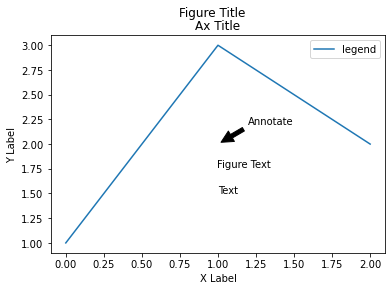

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend')
ax.legend()

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1, y=1.5, s='Text')
fig.text(x=0.51, y=0.42, s='Figure Text')
ax.annotate(text='Annotate', xy=(1, 2), xytext=(1.2, 2.2), arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

## Ⅱ. Text Properties

### 1. Font

- `family` : 글꼴

- `size` or `fontsize` : 폰트 크기

- `style` or `fontstyle` : 폰트 스타일

- `weight` or `fontweight` : 폰트 굵기

<img src='img/font.png'/>

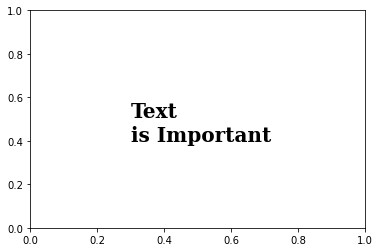

In [2]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.3, y=0.4, s='Text\nis Important',
        fontsize=20, fontweight='bold', fontfamily='serif',)

plt.show()

### 2. Alignment

- `ha` : horizontal alignment

- `va` : vertical alignment

- `rotation`

- `multialignment`

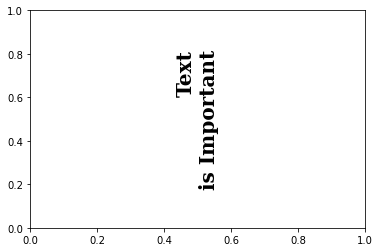

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20, fontweight='bold', fontfamily='serif',
        va='center', ha='center', rotation='vertical', multialignment='right')

plt.show()

### 3. Etc

- `color` : 색

- `linespacing` : 줄간격

- `backgroundcolor` : 하이라이트 색

- `alpha` : 투명도

- `zorder` : z축 위치

- `visible` : 보이게 할지

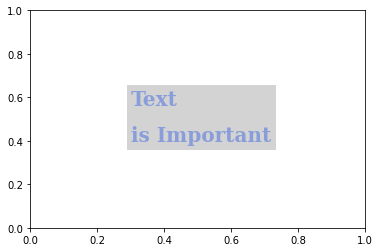

In [4]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.3, y=0.4, s='Text\nis Important',
        fontsize=20, fontweight='bold', fontfamily='serif',
        color='royalblue', linespacing=2, backgroundcolor='lightgray', alpha=0.5)

plt.show()

### 4. Boxes

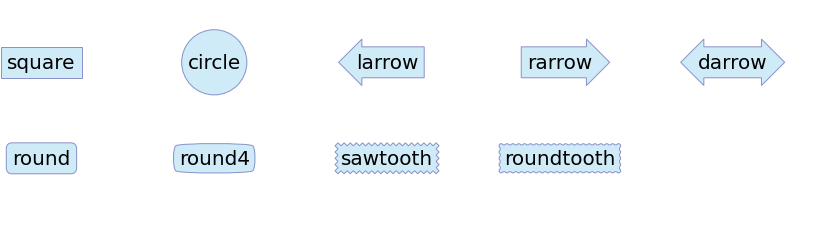

In [5]:
styles = ['square', 'circle', 'larrow', 'rarrow', 'darrow', 'round', 'round4', 'sawtooth', 'roundtooth']

spacing = 1.2
fig, ax = plt.subplots(figsize=(12, 4))

x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 4)

for i, bbox_style in enumerate(styles):
    fig.text(x=x[i%5], y=y[ 2 - i//5], s=bbox_style,
             ha="center", size=20,
             bbox=dict(boxstyle=bbox_style, fc="skyblue", ec="navy", alpha=0.4))

ax.axis('off')
plt.show()

## Ⅲ. Examples

### 1. Scatter Plot

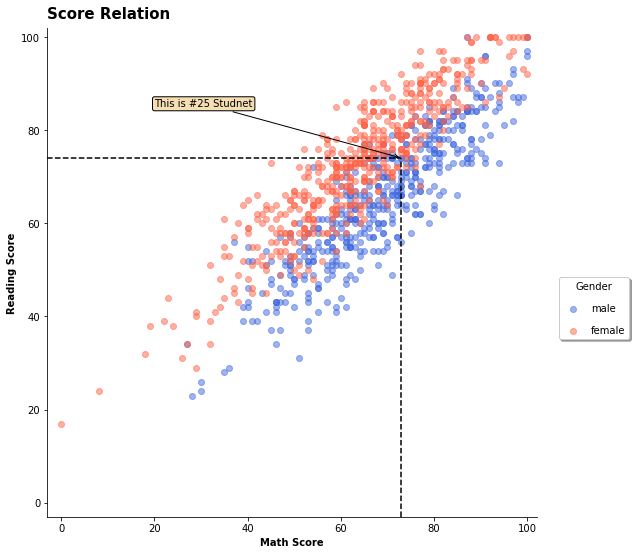

In [6]:
student = pd.read_csv('data/StudentsPerformance.csv')

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for group, color in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender'] == group]
    ax.scatter(x=student_sub['math score'], y=student_sub['reading score'],
               c=color, alpha=0.5, label=group)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score', fontweight='semibold')
ax.set_ylabel('Reading Score', fontweight='semibold')

ax.set_title('Score Relation', 
             loc='left', va='bottom',
             fontweight='bold', fontsize=15)

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    bbox_to_anchor=[1.2, 0.5]
)

i = 25

ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='k', linestyle='--', zorder=8)

ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
       color='k', linestyle='--', zorder=8)

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[20, 85],
            bbox=dict(boxstyle="round", fc='wheat', pad=0.2),
            arrowprops=dict(arrowstyle="->"),
            zorder=9
           )

plt.show()

### 2. Bar Plot

In [7]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

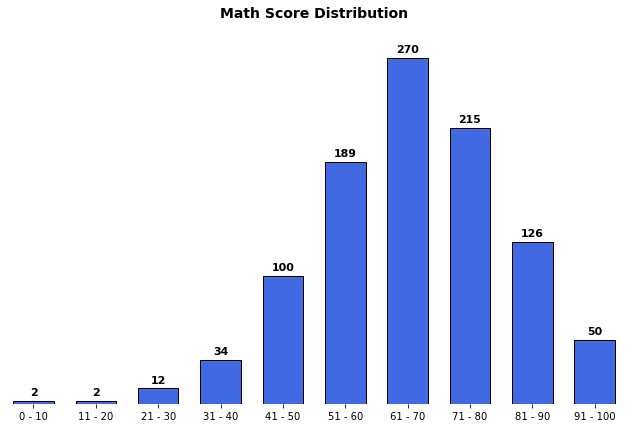

In [8]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(11, 7))
ax.bar(math_grade.index, math_grade, width=0.65, color='royalblue', lw=1, ec='black')

ax.margins(0.01, 0.1)
ax.set(frame_on=False)
ax.set_yticks([])
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold')

plt.show()